In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\Asus\Desktop\datasets\ANZ synthesised transaction dataset (1).xlsx")
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
df.shape

(12043, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [5]:
df.isna().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [6]:
df["date"].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

In [7]:

df['date'] = pd.to_datetime(df['date'])

In [8]:
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

### Transaction amount over Dates

<AxesSubplot:xlabel='date', ylabel='amount'>

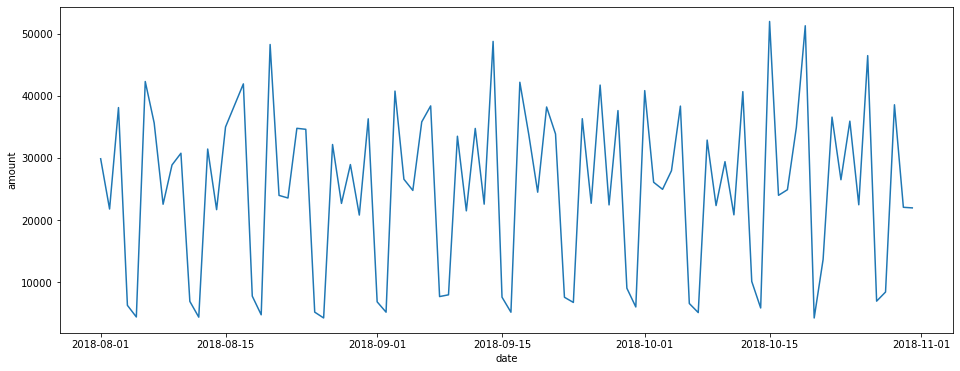

In [9]:
date_group = df.groupby('date')["amount"].sum().reset_index()

plt.figure(figsize=(16, 6))
sns.lineplot(y="amount",x="date",data=date_group)

### Mean transaction amount per day

In [10]:
date_mean = df.groupby('date')['amount'].mean().reset_index()
date_mean.head()

,date,amount
0,2018-08-01,218.014161
1,2018-08-02,143.331053
2,2018-08-03,242.653376
3,2018-08-04,53.356356
4,2018-08-05,44.265000


<AxesSubplot:xlabel='date', ylabel='amount'>

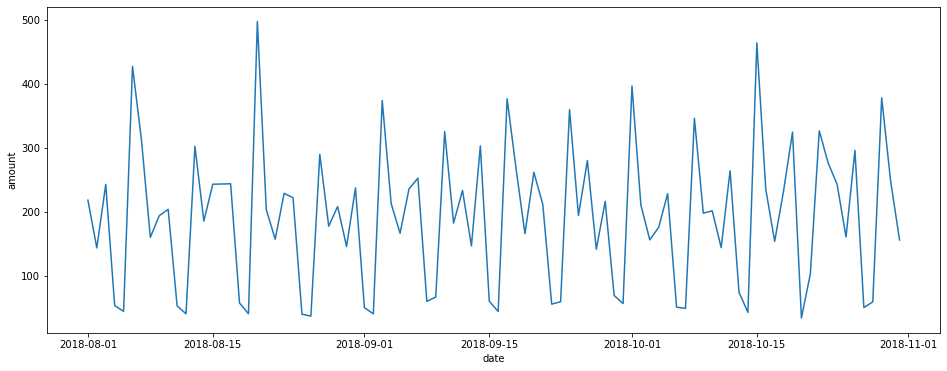

In [11]:
plt.figure(figsize = (16,6))
sns.lineplot(x = 'date', y = 'amount', data = date_mean)

### Transaction amount by Gender

In [12]:
data_gen = df[['date', 'amount', 'gender']]
data_gen

,date,amount,gender
0,2018-08-01,16.25,F
1,2018-08-01,14.19,F
2,2018-08-01,6.42,M
3,2018-08-01,40.90,F
4,2018-08-01,3.25,F
...,...,...,...
12038,2018-10-31,9.79,F
12039,2018-10-31,63.87,M
12040,2018-10-31,43.96,M
12041,2018-10-31,30.77,M


In [13]:
groupdata_gen = data_gen.groupby(['date', 'gender'])['amount'].sum().reset_index()

<AxesSubplot:xlabel='date', ylabel='amount'>

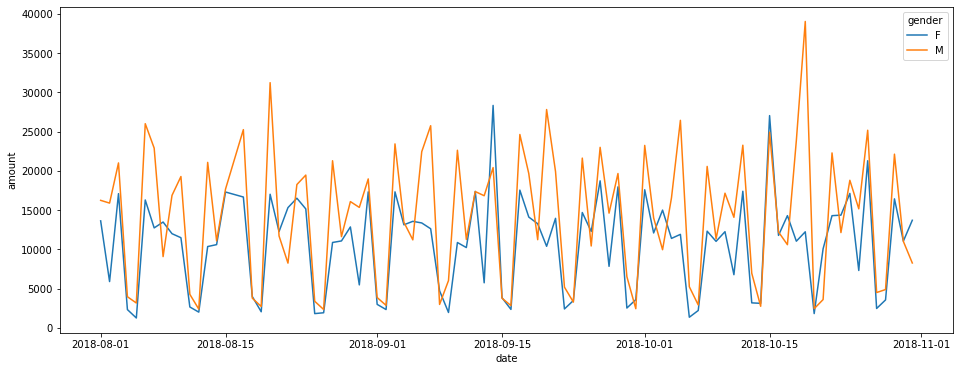

In [14]:
plt.figure(figsize = (16,6))
sns.lineplot(x = 'date', y = 'amount', hue = 'gender', data = groupdata_gen)

#### Looks like men have had higher transcations than women on most days.

M    6285
F    5758
Name: gender, dtype: int64


<AxesSubplot:ylabel='gender'>

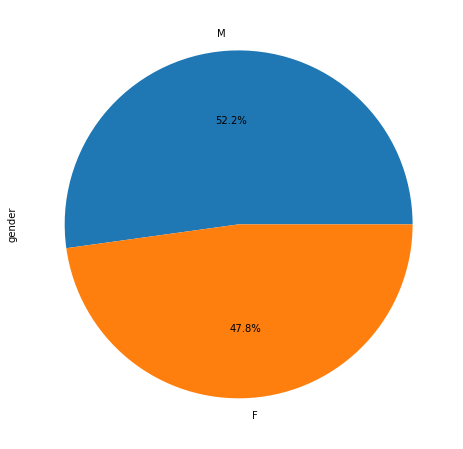

In [15]:
print(df['gender'].value_counts())

plt.figure(figsize = (10,8))
df.gender.value_counts().plot.pie(autopct = '%1.1f%%')

#### Probably because there are more number of male customers than female. However, this cannot be used to make a conclusion regarding transaction amount.

## Mean transaction by Gender

<AxesSubplot:xlabel='date', ylabel='amount'>

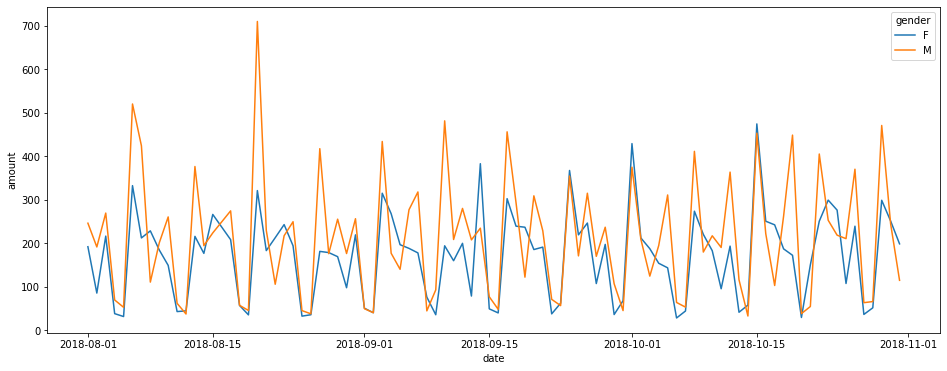

In [16]:
gender_mean = df.groupby(['date', 'gender'])['amount'].mean().reset_index()

plt.figure(figsize = (16,6))
sns.lineplot(y = 'amount', x = 'date', hue = 'gender', data = gender_mean)

### Transaction amount by Merchant State

<AxesSubplot:xlabel='date', ylabel='amount'>

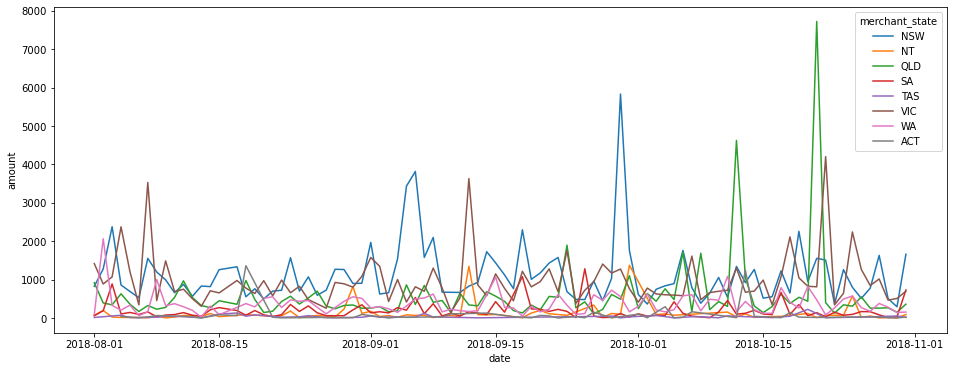

In [17]:
merchant_state = df.groupby(['date', 'merchant_state'])['amount'].sum().reset_index()

plt.figure(figsize = (16,6))
sns.lineplot(x = 'date', y = 'amount', hue = 'merchant_state', data = merchant_state)

<AxesSubplot:xlabel='amount', ylabel='merchant_state'>

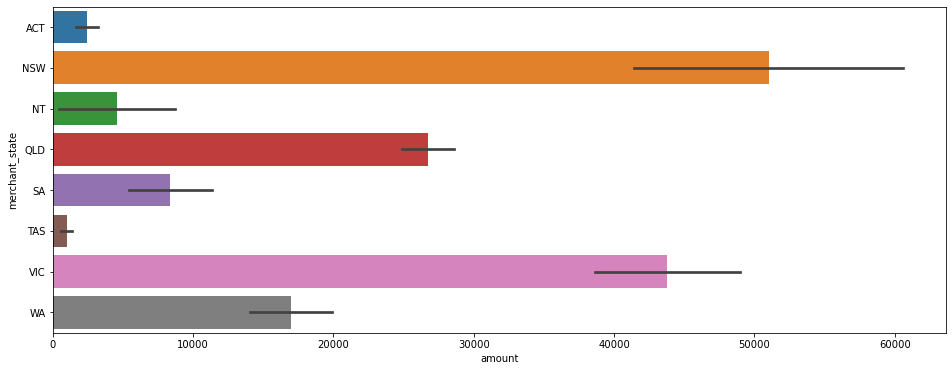

In [18]:
plt.figure(figsize  = (16,6))
merch_state = df.groupby(['gender', 'merchant_state'])['amount'].sum().reset_index()
sns.barplot(x = 'amount', y = 'merchant_state', data = merch_state)

### Transaction amount by merchant state with gender 

<AxesSubplot:xlabel='amount', ylabel='merchant_state'>

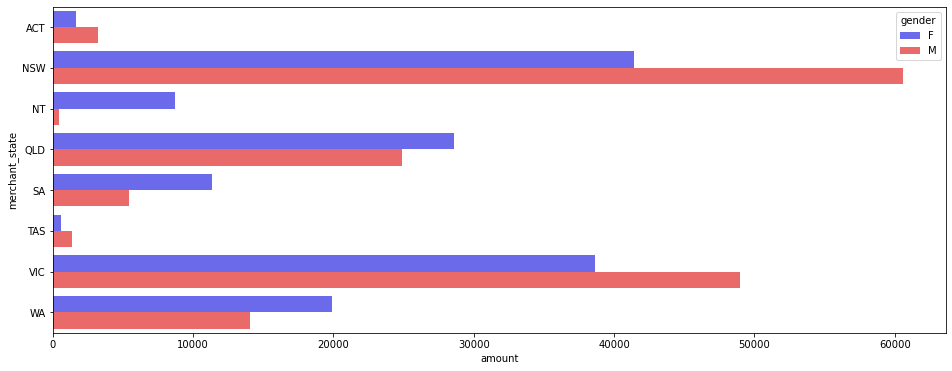

In [19]:
plt.figure(figsize = (16,6))
sns.barplot(x = 'amount', y = 'merchant_state', hue = 'gender', data = merch_state, palette = 'seismic')

### Mean transaction amount by merchant state

<AxesSubplot:xlabel='date', ylabel='amount'>

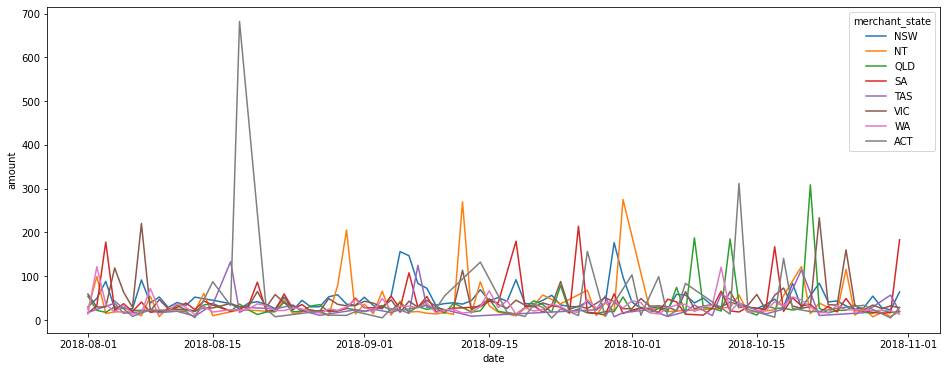

In [20]:
plt.figure(figsize = (16,6))
merchant_mean = df.groupby(['date', 'merchant_state'])['amount'].mean().reset_index()
sns.lineplot(x = 'date', y = 'amount', hue = 'merchant_state', data = merchant_mean)

## Visualisations with Months and Days

In [21]:
df['day_name'] = df['date'].dt.day_name()
df['day_name'].head()

0    Wednesday
1    Wednesday
2    Wednesday
3    Wednesday
4    Wednesday
Name: day_name, dtype: object

In [22]:
df['month_name'] = df['date'].dt.month_name()
df['month_name'].head()

0    August
1    August
2    August
3    August
4    August
Name: month_name, dtype: object

In [23]:
df['month_name'].value_counts()

October      4087
September    4013
August       3943
Name: month_name, dtype: int64

In [24]:
df['day_name'].value_counts()

Friday       2073
Wednesday    2063
Thursday     1801
Saturday     1709
Sunday       1550
Tuesday      1487
Monday       1360
Name: day_name, dtype: int64

<AxesSubplot:ylabel='day_name'>

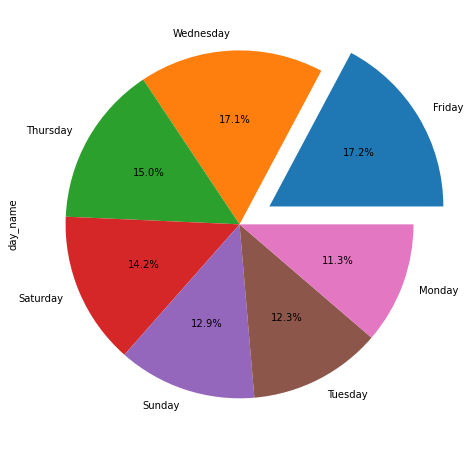

In [25]:
plt.figure(figsize = (8,8))
df['day_name'].value_counts().plot.pie(autopct = '%1.1f%%',explode = (0.2,0,0,0,0,0,0))

#### The highest number of transactions was made on Fridays.

### Max, Min and Mean Transaction amount in the month of August

In [26]:
aug = (df['month_name'] == 'August')
print("The maximum transaction made in August is: {}".format(df.loc[aug, 'amount'].max()))
print("The minimum transaction made in August is {}".format(df.loc[aug, 'amount'].min()))
print("The mean transaction made in August is {}".format(df.loc[aug, 'amount'].mean()))

The maximum transaction made in August is: 8835.98
The minimum transaction made in August is 1.52
The mean transaction made in August is 185.12186659903654


### Max, Min and Mean Transaction amount in the month of September


In [27]:
sept = (df['month_name'] == 'September')
print("The maximum transaction made in September is: {}".format(df.loc[sept, 'amount'].max()))
print("The minimum transaction made in September is {}".format(df.loc[sept, 'amount'].min()))
print("The mean transaction made in September is {}".format(df.loc[sept, 'amount'].mean()))

The maximum transaction made in September is: 8835.98
The minimum transaction made in September is 0.1
The mean transaction made in September is 182.04590331422853


### Max, Min and Mean Transaction amount in the month of October

In [28]:
oct = (df['month_name'] == 'October')
print("The maximum transaction made in October is: {}".format(df.loc[oct, 'amount'].max()))
print("The minimum transaction made in October is {}".format(df.loc[oct, 'amount'].min()))
print("The mean transaction made in October is {}".format(df.loc[oct, 'amount'].mean()))

The maximum transaction made in October is: 8835.98
The minimum transaction made in October is 0.1
The mean transaction made in October is 196.42732321996542


#### 1. The maximum transaction amount allowed for ANZ bank seems to be 8835.98 dollars.
#### 2. The highest mean transaction amount was recorded in the month of October.


### Monthly transactions based on Gender

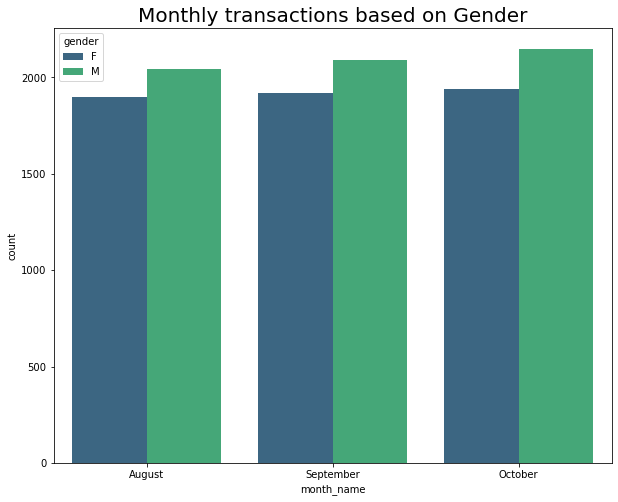

In [29]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'month_name', hue = 'gender', data = df, palette = 'viridis')
plt.title('Monthly transactions based on Gender', fontsize = 20)
plt.show()

### Transaction amount per day based on Gender

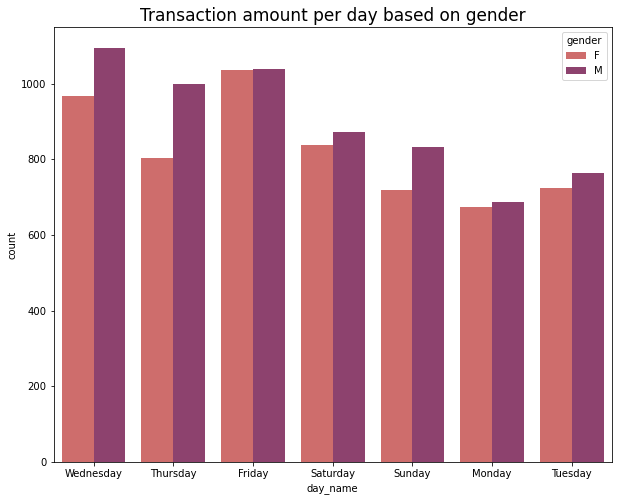

In [30]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'day_name', hue = 'gender', data = df, palette = 'flare')
plt.title('Transaction amount per day based on gender', fontsize = 17)
plt.show()

### Number of customers with physical card present/absent

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64


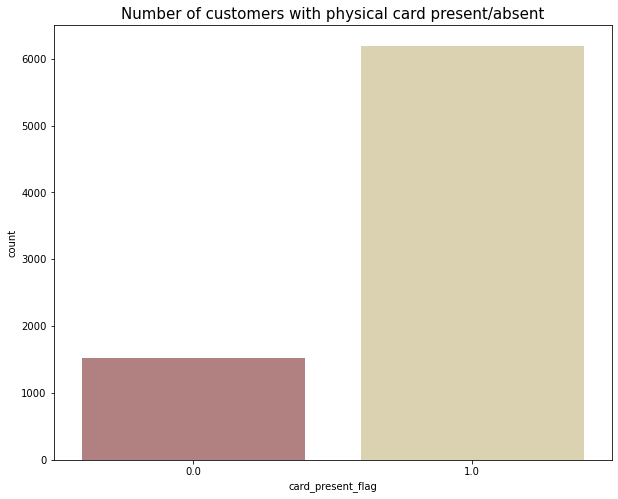

In [31]:
plt.figure(figsize = (10,8))
print(df['card_present_flag'].value_counts())
sns.countplot(x = 'card_present_flag', data = df, palette = 'pink')
plt.title('Number of customers with physical card present/absent', fontsize = 15)

plt.show()

#### Almost 6000+ customers had a physical card present while making their transactions, while almost 1000 customers did not.

### Number of customers per state

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64


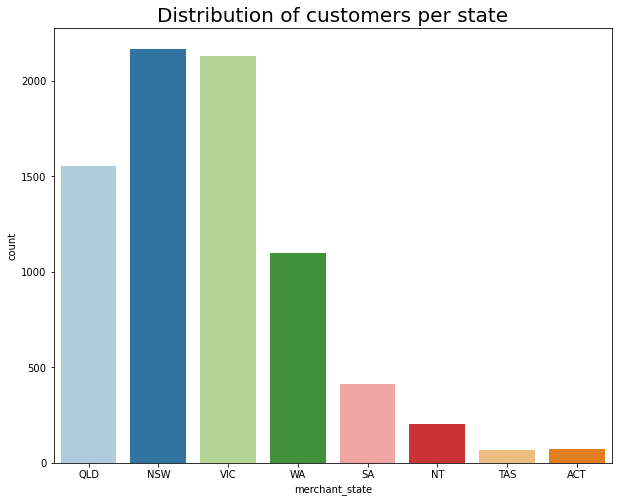

In [32]:
print(df['merchant_state'].value_counts())
plt.figure(figsize = (10,8))
sns.countplot(x = 'merchant_state', data = df, palette = 'Paired')
plt.title('Distribution of customers per state', fontsize = 20)
plt.show()

### Percentage of Source by where transaction took place

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64


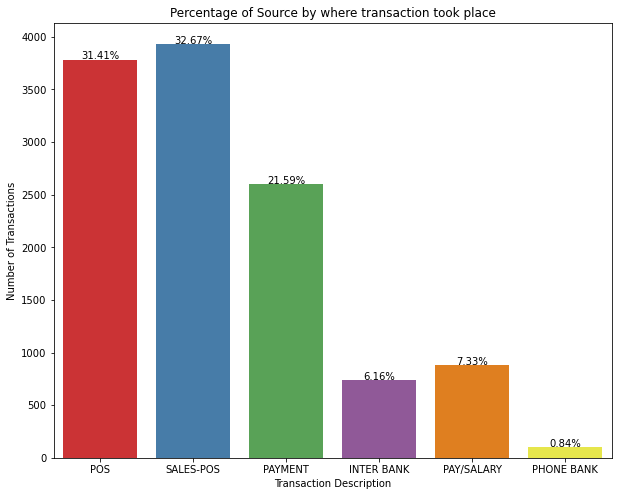

In [33]:
print(df['txn_description'].value_counts())
plt.figure(figsize=(10,8))
total = float(len(df))
ax = sns.countplot(x = df['txn_description'], data = df, palette = 'Set1')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3, '{:.2%}'.format(height/total), ha="center") 
plt.title('Percentage of Source by where transaction took place')
plt.ylabel('Number of Transactions')
plt.xlabel('Transaction Description')
plt.show()

#### The lowest source of transaction is phone banking.


### Distribution of customers based on age group

Text(0.5, 1.0, 'Distribution of customers based on age group')

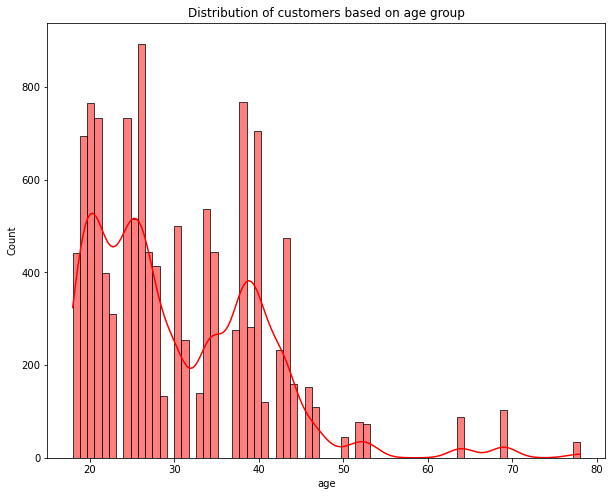

In [34]:
plt.figure(figsize=(10,8))
sns.histplot(x = df['age'], kde = True, color = 'red', bins = 70);
plt.title('Distribution of customers based on age group')

### Age groups with distribution of balance

Text(0.5, 1.0, 'Age groups with disribution of balance')

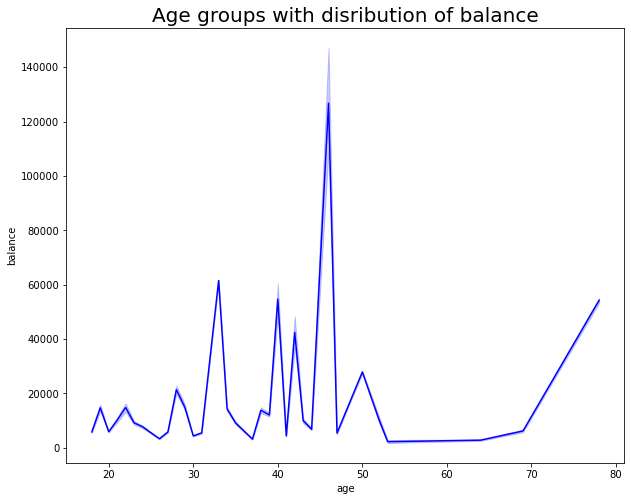

In [35]:
plt.figure(figsize = (10,8))
sns.lineplot(x = 'age',y = 'balance', data = df, color = 'blue')
plt.title('Age groups with disribution of balance', fontsize = 20)

#### Conclusions:
1. People of ages between 45-50 have an approximate balance of 130000AUD.
2. People of ages between 50-70 have an a balance below 200000AUD.

### Transaction volume by merchant value (sum)

In [36]:
merch_suburb = df.groupby(['merchant_suburb'])['amount'].sum().reset_index()
merch_suburb

,merchant_suburb,amount
0,Abbotsford,2004.29
1,Aberdeen,52.45
2,Aberfeldie,57.77
3,Aberfoyle Park,84.92
4,Acacia Ridge,10.30
...,...,...
1604,Yulara,80.07
1605,Yungaburra,105.38
1606,Zetland,78.47
1607,Zillmere,38.63


In [37]:
suburb_sorted = merch_suburb.sort_values(by = 'amount', ascending = False)
print("Top 10 regions with most value of transactions over 91 days are-")
print(suburb_sorted.head(10).values)

Top 10 regions with most value of transactions over 91 days are-
[['Sydney' 21675.44000000002]
 ['Melbourne' 11943.529999999995]
 ['South Brisbane' 11740.58]
 ['Mascot' 10282.619999999999]
 ['Mount Gambier' 4710.25]
 ['Malvern' 3994.8300000000004]
 ['Maribyrnong' 3770.8299999999995]
 ['Parap' 3323.51]
 ['Brisbane City' 2724.45]
 ['Mount Gravatt' 2721.14]]


(-0.5, 1399.5, 1299.5, -0.5)

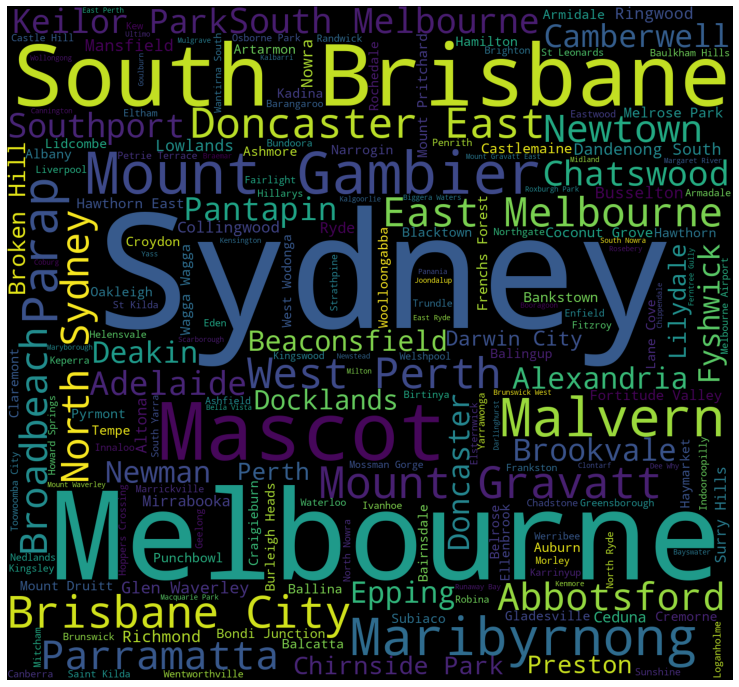

In [38]:
from wordcloud import WordCloud
tuple_suburb_sum = [tuple(x) for x in merch_suburb.values]
plt.subplots(figsize = (13,13))
wordcloud = WordCloud(width = 1400, height = 1300).generate_from_frequencies(dict(tuple_suburb_sum))
plt.imshow(wordcloud)
plt.axis("off")

### Account balance by Gender

<AxesSubplot:xlabel='date', ylabel='balance'>

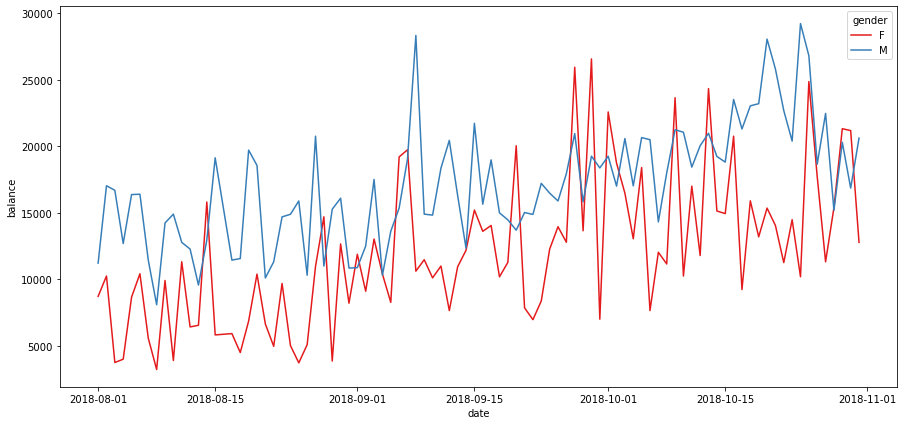

In [39]:
plt.figure(figsize = (15,7))
acc_bal_mean= df.groupby(["date",'gender'])["balance"].mean().reset_index()
sns.lineplot(x = 'date', y = 'balance', hue = 'gender', data = acc_bal_mean, palette = 'Set1')

### Debit-credit transaction by Gender

<AxesSubplot:xlabel='movement', ylabel='amount'>

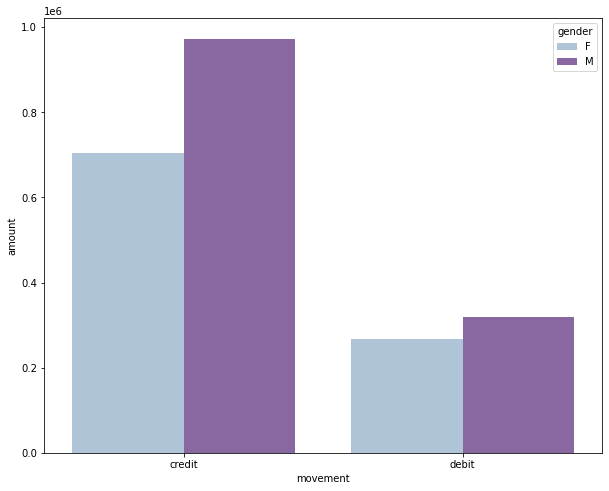

In [40]:
debit_credit = df.groupby(['movement','gender'])['amount'].sum().reset_index()
plt.figure(figsize = (10,8))
sns.barplot(x = 'movement', y = 'amount', hue = 'gender', data = debit_credit, palette = 'BuPu')

### Debit Credit transaction by Age

<AxesSubplot:xlabel='movement', ylabel='amount'>

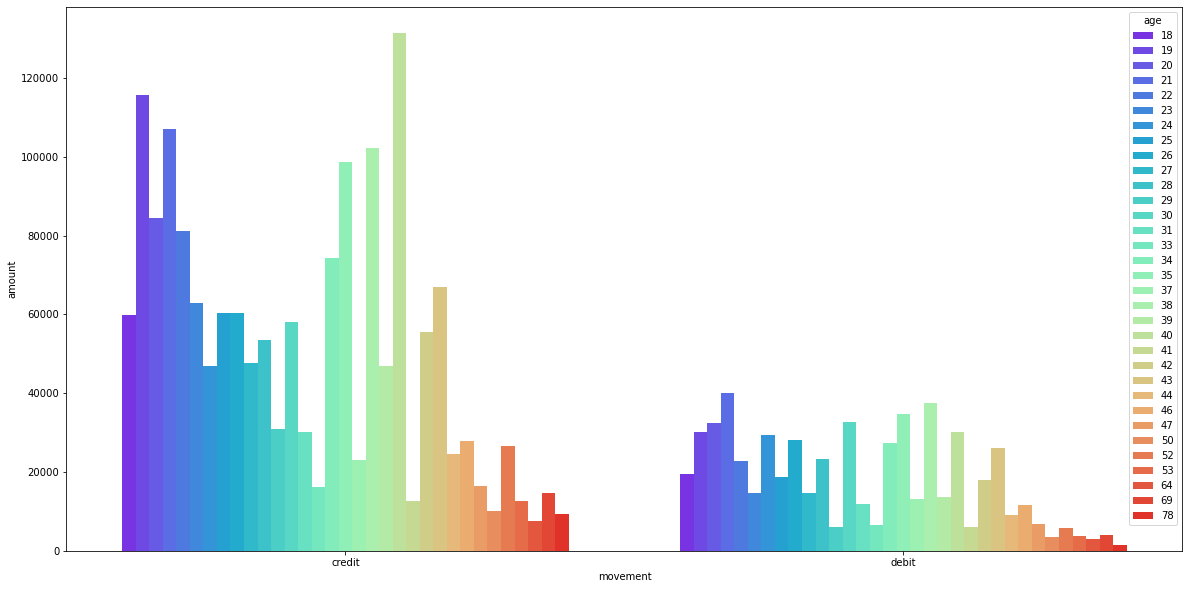

In [42]:
debit_credit_age = df.groupby(['movement','age'])['amount'].sum().reset_index()
plt.figure(figsize = (20,10))
sns.barplot(x = 'movement', y = 'amount', hue = 'age', data = debit_credit_age, palette = 'rainbow')

### Visualising top 10 customers

In [51]:
top_cust = df['first_name'].value_counts(sort=True).head(10)
top_cust

Michael        746
Diana          578
Jessica        408
Joseph         391
Jeffrey        388
Richard        364
Kimberly       343
Tonya          292
Susan          282
Christopher    263
Name: first_name, dtype: int64

[Text(0.5, 1.0, 'Top 10 Customers'),
 Text(0.5, 0, 'Number of Transactions made')]

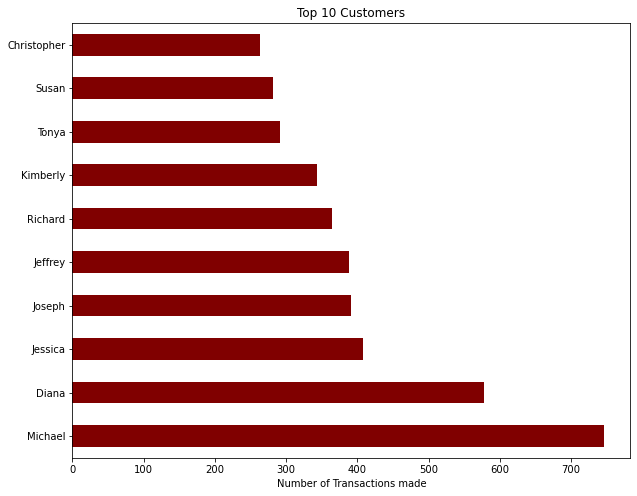

In [67]:
fig,ax = plt.subplots(figsize = (10,8))
top_cust.plot.barh(color = 'maroon')
ax.set(title = "Top 10 Customers", xlabel = "Number of Transactions made")